# Import data, libraries and checklist

In [ ]:
#importing the libraries we require in the project
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
pd.set_option('display.max_columns', 50)
import matplotlib.pyplot as plt

In [ ]:
#importing the data set trial
audit_trial=pd.read_csv('https://raw.githubusercontent.com/caichinger/MLMNC2020/master/projects/AuditDataDataSet/data/trial.csv')

In [ ]:
# 0. train test split
#X_train, X_test, y_train, y_test = train_test_split(X, y)

# 1. choose a model
#from sklearn.model_family import DesiredModel

# 2. instantiate a model with certain parameters
#model = DesiredModel(model_parameters)

# 3. fit a model to the data
#model.fit(X_train, y_train)

# 4. evaluate
#model.score(X_test, y_test), model.score(X_train, y_train)

# 5. use the model to make a prediction
#y_new = model.predict(X_new)

# Data Exploration


In [ ]:
#Starting to explore data by looking at a rough description
audit_trial.describe().round(2)

,Sector_score,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
count,776.00,776.00,776.00,776.00,776.00,776.00,776.00,776.00,775.00,776.00,776.00,776.00,776.00,776.00,776.00,776.00,776.00
mean,20.18,2.45,3.51,10.80,3.13,13.22,5.07,2.24,14.14,2.91,2.51,0.03,2.06,0.10,2.17,2.70,0.63
std,24.32,5.68,1.74,50.08,1.70,51.31,0.26,0.80,66.61,1.60,1.23,0.18,0.38,0.53,0.68,0.86,0.48
min,1.85,0.00,2.00,0.00,2.00,0.00,5.00,2.00,0.00,2.00,2.00,0.00,2.00,0.00,2.00,2.00,0.00
25%,2.37,0.21,2.00,0.00,2.00,0.54,5.00,2.00,0.00,2.00,2.00,0.00,2.00,0.00,2.00,2.00,0.00
50%,3.89,0.88,2.00,0.40,2.00,1.37,5.00,2.00,0.09,2.00,2.00,0.00,2.00,0.00,2.00,2.40,1.00
75%,55.57,2.48,6.00,4.16,4.00,7.71,5.00,2.00,5.60,4.00,2.00,0.00,2.00,0.00,2.00,3.25,1.00
max,59.85,85.00,6.00,1264.63,6.00,1268.91,9.00,6.00,935.03,6.00,6.00,2.00,6.00,9.00,6.00,5.20,1.00


We can see that Para_A has an outlier because 85 is the max but the mean value is only 2.45. Actually the same might be true for Para_B even more extreme with max being 1264


In [ ]:
#Looking at the first 5 entries of the risk data set
audit_trial.head()

,Sector_score,LOCATION_ID,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
0,3.89,23,4.18,6,2.50,2,6.68,5.0,2,3.38,2,2,0,2,0,2,2.4,1
1,3.89,6,0.00,2,4.83,2,4.83,5.0,2,0.94,2,2,0,2,0,2,2.0,0
2,3.89,6,0.51,2,0.23,2,0.74,5.0,2,0.00,2,2,0,2,0,2,2.0,0
3,3.89,6,0.00,2,10.80,6,10.80,6.0,6,11.75,6,2,0,2,0,2,4.4,1
4,3.89,6,0.00,2,0.08,2,0.08,5.0,2,0.00,2,2,0,2,0,2,2.0,0


In [ ]:
#Do we know how to quickly scroll through all the results? It looked like there might be some weird text values in some rows.

In [ ]:
audit_trial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sector_score   776 non-null    float64
 1   LOCATION_ID    776 non-null    object 
 2   PARA_A         776 non-null    float64
 3   SCORE_A        776 non-null    int64  
 4   PARA_B         776 non-null    float64
 5   SCORE_B        776 non-null    int64  
 6   TOTAL          776 non-null    float64
 7   numbers        776 non-null    float64
 8   Marks          776 non-null    int64  
 9   Money_Value    775 non-null    float64
 10  MONEY_Marks    776 non-null    int64  
 11  District       776 non-null    int64  
 12  Loss           776 non-null    int64  
 13  LOSS_SCORE     776 non-null    int64  
 14  History        776 non-null    int64  
 15  History_score  776 non-null    int64  
 16  Score          776 non-null    float64
 17  Risk           776 non-null    int64  
dtypes: float64

In [ ]:
audit_trial.LOCATION_ID.value_counts()

8          76
19         68
9          53
16         52
12         47
5          44
2          41
4          37
13         35
15         35
6          33
32         29
11         26
22         24
29         21
14         20
18         16
31         12
1          11
37         10
39          9
21          8
28          8
27          8
43          7
25          6
20          5
30          4
36          4
7           4
38          4
3           3
40          3
35          2
LOHARU      1
24          1
17          1
NUH         1
SAFIDON     1
44          1
42          1
41          1
23          1
33          1
34          1
Name: LOCATION_ID, dtype: int64

In [ ]:
audit_trial.corr('spearman').style.background_gradient().format('{:.2f}')

,Sector_score,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
Sector_score,1.00,-0.38,-0.38,-0.13,-0.10,-0.31,-0.07,-0.07,-0.17,-0.13,-0.15,-0.08,-0.09,-0.05,-0.05,-0.30,-0.37
PARA_A,-0.38,1.00,0.91,0.53,0.55,0.82,0.28,0.28,0.46,0.45,0.09,0.10,0.10,0.27,0.27,0.72,0.65
SCORE_A,-0.38,0.91,1.00,0.54,0.56,0.79,0.29,0.29,0.48,0.49,0.08,0.10,0.10,0.28,0.28,0.77,0.69
PARA_B,-0.13,0.53,0.54,1.00,0.83,0.85,0.32,0.32,0.58,0.55,-0.04,0.07,0.06,0.30,0.30,0.72,0.46
SCORE_B,-0.10,0.55,0.56,0.83,1.00,0.78,0.33,0.33,0.58,0.57,-0.00,0.10,0.09,0.32,0.32,0.82,0.53
TOTAL,-0.31,0.82,0.79,0.85,0.78,1.00,0.32,0.32,0.59,0.55,0.02,0.10,0.10,0.30,0.30,0.84,0.69
numbers,-0.07,0.28,0.29,0.32,0.33,0.32,1.00,1.00,0.42,0.51,0.14,0.03,0.05,0.23,0.23,0.46,0.24
Marks,-0.07,0.28,0.29,0.32,0.33,0.32,1.00,1.00,0.42,0.51,0.14,0.03,0.05,0.23,0.23,0.46,0.24
Money_Value,-0.17,0.46,0.48,0.58,0.58,0.59,0.42,0.42,1.00,0.80,0.06,0.12,0.13,0.31,0.31,0.67,0.46
MONEY_Marks,-0.13,0.45,0.49,0.55,0.57,0.55,0.51,0.51,0.80,1.00,0.08,0.10,0.12,0.36,0.36,0.70,0.45


SCORE_A and Score seem to have a relatively high correlation with Risk

SCORE_B and money marks also seem to be quite relevant

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd52a3674e0>,
      dtype=object)

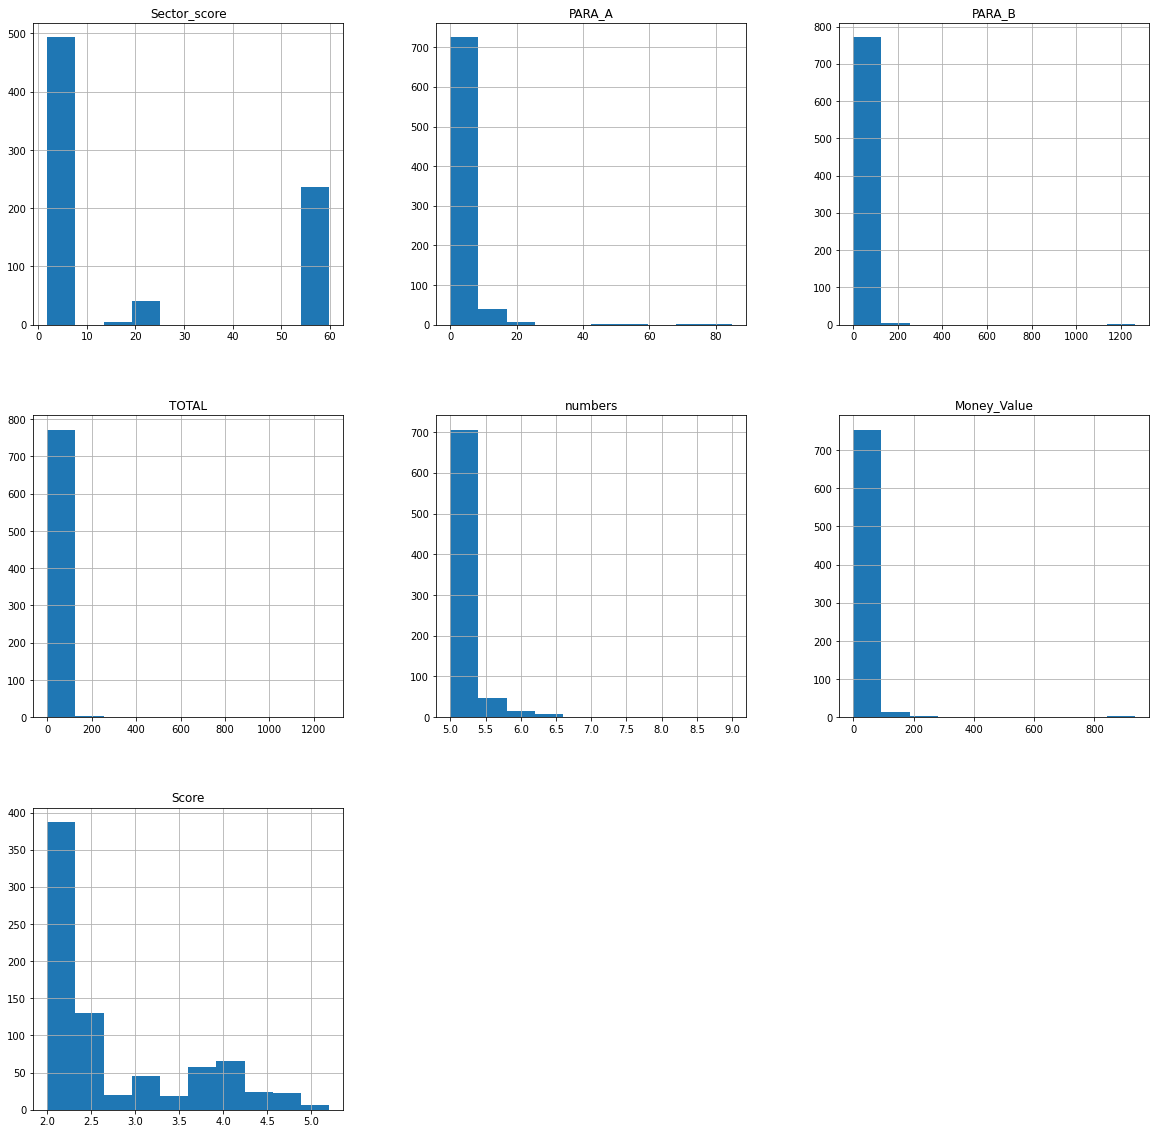

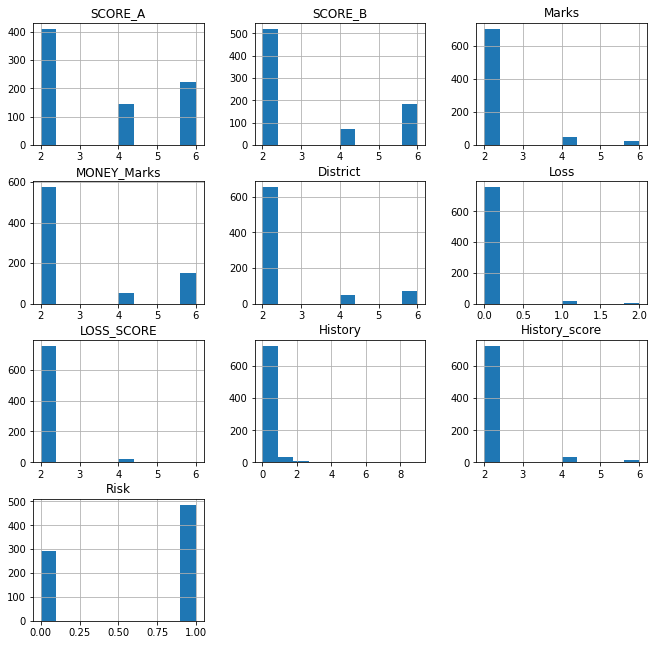

In [ ]:
audit_trial[audit_trial.dtypes[(audit_trial.dtypes=="float")].index.values].hist(figsize=[20,20])
audit_trial[audit_trial.dtypes[(audit_trial.dtypes=="int64")].index.values].hist(figsize=[11,11])


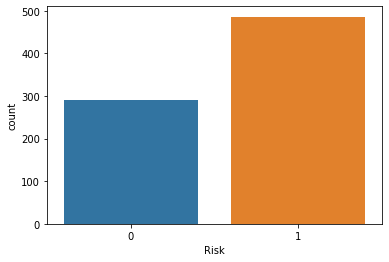

In [ ]:
sns.countplot(audit_trial['Risk'], label = "Count")

# Data Preparation

Deleting TOTAL, which is just the total of PARA_A and PARA_B

In [ ]:
cols_del=['TOTAL']

audit_trial.drop(cols_del, axis=1, inplace=True)

In [ ]:
audit_trial.isna().sum()

Sector_score     0
LOCATION_ID      0
PARA_A           0
SCORE_A          0
PARA_B           0
SCORE_B          0
numbers          0
Marks            0
Money_Value      1
MONEY_Marks      0
District         0
Loss             0
LOSS_SCORE       0
History          0
History_score    0
Score            0
Risk             0
dtype: int64

In [ ]:
#We need to drop the row where Money_Value = NaN

In [ ]:
audit_trial = audit_trial[audit_trial['Money_Value'].notna()]

In [ ]:
audit_trial.isna().sum()

Sector_score     0
LOCATION_ID      0
PARA_A           0
SCORE_A          0
PARA_B           0
SCORE_B          0
numbers          0
Marks            0
Money_Value      0
MONEY_Marks      0
District         0
Loss             0
LOSS_SCORE       0
History          0
History_score    0
Score            0
Risk             0
dtype: int64

In [ ]:
audit_trial.shape

(775, 17)

In [ ]:
#Unique values in LOCATION_ID column
audit_trial["LOCATION_ID"].unique()

array(['23', '6', '7', '8', '13', '37', '24', '3', '4', '14', '5', '20',
       '19', '21', '22', '9', '11', '12', '29', '30', '38', '31', '2',
       '32', '16', '33', '15', '36', '34', '18', '25', '39', '27', '35',
       '40', '41', '42', '1', '28', 'LOHARU', 'NUH', 'SAFIDON', '43',
       '44', '17'], dtype=object)

In [ ]:
audit_trial = audit_trial[(audit_trial.LOCATION_ID != 'LOHARU')]
audit_trial = audit_trial[(audit_trial.LOCATION_ID != 'NUH')]
audit_trial = audit_trial[(audit_trial.LOCATION_ID != 'SAFIDON')]
audit_trial = audit_trial.astype(float)


In [ ]:
audit_trial.corr()

,Sector_score,LOCATION_ID,PARA_A,SCORE_A,PARA_B,SCORE_B,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
Sector_score,1.000000,-0.057494,-0.217724,-0.427975,-0.133234,-0.220443,-0.152502,-0.171165,-0.118328,-0.320549,-0.108938,-0.083528,-0.087139,-0.115293,-0.137511,-0.339585,-0.378484
LOCATION_ID,-0.057494,1.000000,-0.004792,0.082383,0.007476,0.127539,0.007817,-0.016310,-0.065391,0.109280,-0.108128,0.007084,-0.002714,-0.080681,-0.052949,0.089858,0.046937
PARA_A,-0.217724,-0.004792,1.000000,0.496187,0.161610,0.357831,0.133373,0.140172,0.449181,0.285257,0.127129,0.045109,0.043415,0.117962,0.172257,0.426005,0.291357
SCORE_A,-0.427975,0.082383,0.496187,1.000000,0.248984,0.571429,0.242054,0.273863,0.205752,0.477646,0.087017,0.092808,0.093093,0.177411,0.264772,0.719458,0.670255
PARA_B,-0.133234,0.007476,0.161610,0.248984,1.000000,0.347265,0.209630,0.230601,0.124881,0.314213,0.082530,0.044642,0.042374,0.203407,0.316353,0.396977,0.162085
SCORE_B,-0.220443,0.127539,0.357831,0.571429,0.347265,1.000000,0.277058,0.313209,0.204798,0.566752,-0.006085,0.098434,0.092109,0.200412,0.309058,0.901051,0.513396
numbers,-0.152502,0.007817,0.133373,0.242054,0.209630,0.277058,1.000000,0.908107,0.186021,0.446362,0.124540,-0.001698,0.035597,0.202121,0.209340,0.502699,0.196923
Marks,-0.171165,-0.016310,0.140172,0.273863,0.230601,0.313209,0.908107,1.000000,0.220167,0.506918,0.149839,0.004516,0.036657,0.225950,0.248141,0.565835,0.227157
Money_Value,-0.118328,-0.065391,0.449181,0.205752,0.124881,0.204798,0.186021,0.220167,1.000000,0.391195,0.027912,0.024406,0.031653,0.079935,0.112008,0.291557,0.160213
MONEY_Marks,-0.320549,0.109280,0.285257,0.477646,0.314213,0.566752,0.446362,0.506918,0.391195,1.000000,0.079985,0.118307,0.129552,0.246532,0.334320,0.757863,0.438680


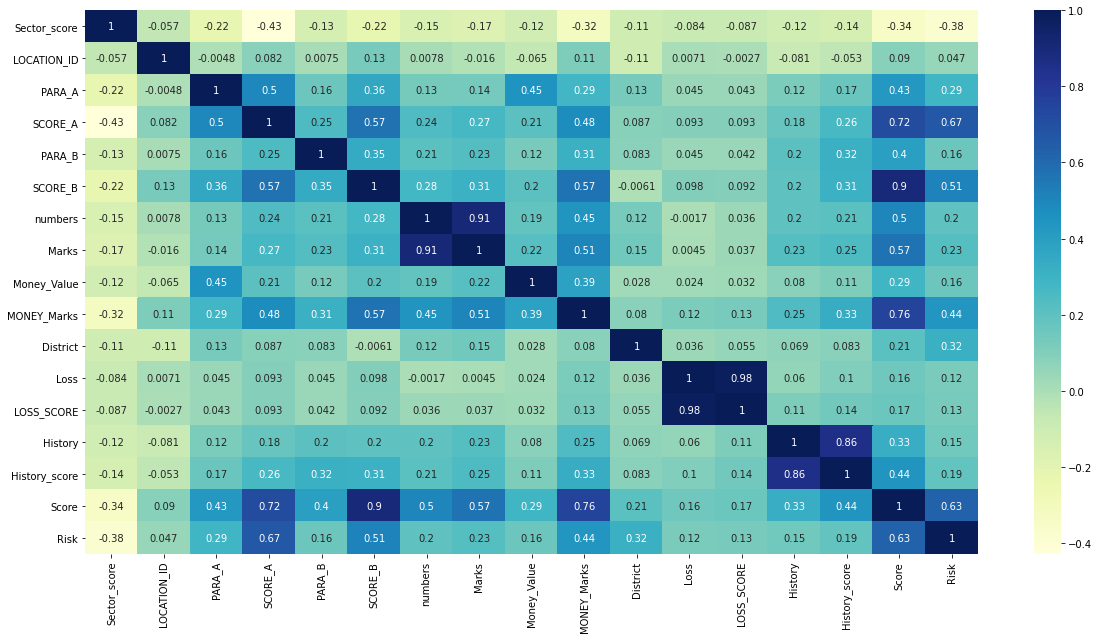

In [ ]:
plt.figure(figsize=(20,10)) 
sns.heatmap(audit_trial.corr(),annot=True, cmap="YlGnBu")

LOSS_score and Loss seem to be directly correlated, therefore we can drop one of them. Similar thing with Marks and numbers.Similar with History_score and History.
We decided to drop them to avoid overfitting the model.

In [ ]:
cols_del=['SCORE_A', 'SCORE_B','Marks','MONEY_Marks','LOSS_SCORE','History_score']

audit_trial.drop(cols_del, axis=1, inplace=True)

In [ ]:
audit_trial.describe().round(3)

,Sector_score,LOCATION_ID,PARA_A,PARA_B,numbers,Money_Value,District,Loss,History,Score,Risk
count,772.000,772.00,772.000,772.000,772.000,772.000,772.000,772.000,772.000,772.000,772.000
mean,20.209,14.87,2.461,10.856,5.068,14.191,2.508,0.030,0.105,2.706,0.630
std,24.322,9.89,5.692,50.207,0.265,66.730,1.231,0.185,0.532,0.860,0.483
min,1.850,1.00,0.000,0.000,5.000,0.000,2.000,0.000,0.000,2.000,0.000
25%,2.370,8.00,0.208,0.000,5.000,0.000,2.000,0.000,0.000,2.000,0.000
50%,3.890,13.00,0.880,0.415,5.000,0.090,2.000,0.000,0.000,2.400,1.000
75%,55.570,19.00,2.482,4.170,5.000,5.630,2.000,0.000,0.000,3.400,1.000
max,59.850,44.00,85.000,1264.630,9.000,935.030,6.000,2.000,9.000,5.200,1.000


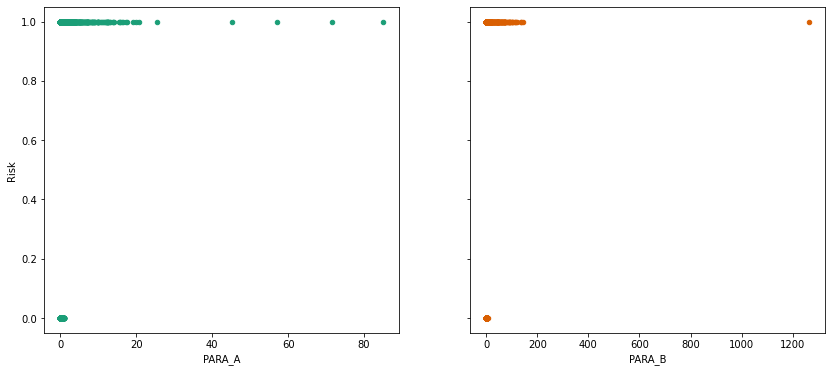

In [ ]:
xnames = ['PARA_A','PARA_B','numbers','Money_Value','District','Loss','History','Sector_score']
yname = 'Risk'
COLORS = {'PARA_A': '#1b9e77',
          'PARA_B': '#d95f02'}

fig, axs = plt.subplots(figsize=(14, 6), ncols=2, sharey=True)
for xname, ax in zip(xnames, axs):
    audit_trial.plot.scatter(ax=ax, x=xname, y=yname, color=COLORS[xname])

##LOG REG NEW



In [ ]:
#Train-Test Split
from sklearn.model_selection import train_test_split

X = audit_trial[xnames]
y = audit_trial[yname]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)
print(X_train.shape, X_test.shape)

(540, 8) (232, 8)


(-1.0, 2.5)

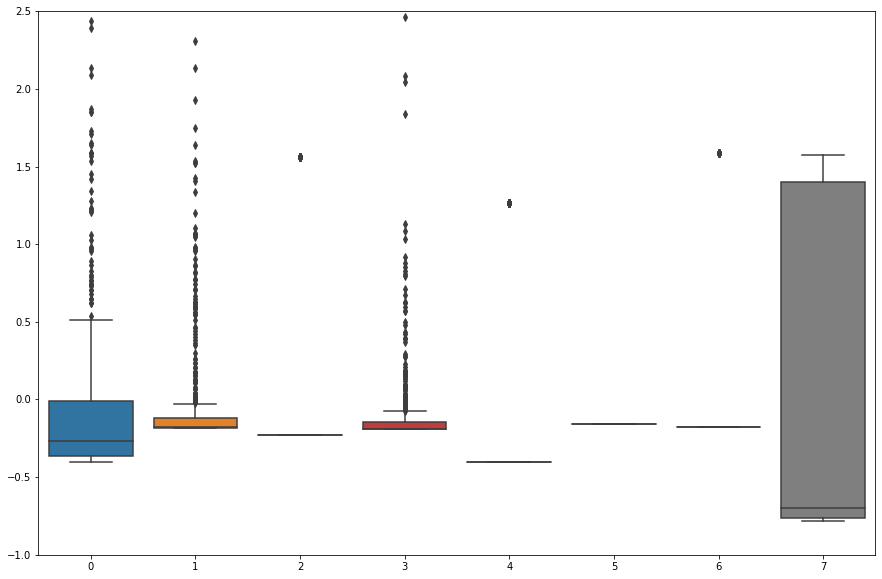

In [ ]:
from sklearn.preprocessing import StandardScaler

standard_scaler=StandardScaler()
X_train=standard_scaler.fit_transform(X_train)
X_test=standard_scaler.transform(X_test)

x2=pd.DataFrame(X_train)
plt.figure(figsize=(15,10))
sns.boxplot(data = x2)
plt.ylim(-1,2.5)

In [ ]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
logreg.score(X_train, y_train), logreg.score(X_test, y_test)

(0.8962962962962963, 0.8922413793103449)

In [ ]:
y_pred_log=logreg.predict(X_test)

In [ ]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_log)
cnf_matrix

array([[ 76,   4],
       [ 21, 131]])

In [ ]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

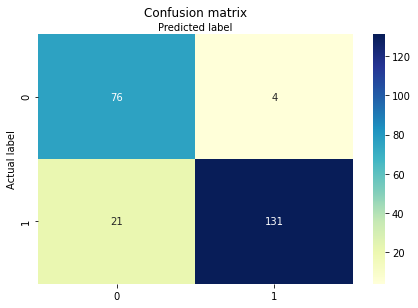

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_log))
print("Precision:",metrics.precision_score(y_test, y_pred_log))
print("Recall:",metrics.recall_score(y_test, y_pred_log))

Accuracy: 0.8922413793103449
Precision: 0.9703703703703703
Recall: 0.8618421052631579


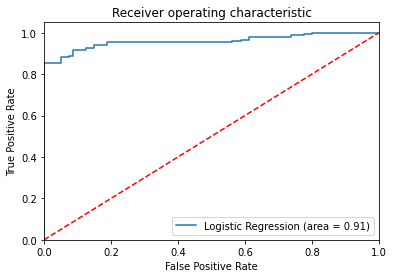

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

         0.0       0.78      0.95      0.86        80
         1.0       0.97      0.86      0.91       152

    accuracy                           0.89       232
   macro avg       0.88      0.91      0.89       232
weighted avg       0.91      0.89      0.89       232



**Now optimizing the model with GridSearchCV**

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

# Instantiate the GridSearchCV object: logreg_cv
logregNiko_cv = GridSearchCV(logreg, param_grid, cv=5)

# fit the model with data
logregNiko_cv.fit(X_train,y_train)

# Print the tuned parameter and score
print("Tuned Logistic Regression Parameters: {}".format(logregNiko_cv.best_params_))
print("Best score is {}".format(logregNiko_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 163789.3706954068}
Best score is 0.9574074074074075


In [ ]:
logregNiko_cv.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.00000000e-05, 8.48342898e-05, 7.19685673e-04, 6.10540230e-03,
       5.17947468e-02, 4.39397056e-01, 3.72759372e+00, 3.16227766e+01,
       2.68269580e+02, 2.27584593e+03, 1.93069773e+04, 1.63789371e+05,
       1.38949549e+06, 1.17876863e+07, 1.00000000e+08])},
             pre_dispatch='2*n_jobs', refit=True, r

In [ ]:
y_pred_cv=logregNiko_cv.predict(X_test)

In [ ]:
logregNiko_cv.score(X_train, y_train), logregNiko_cv.score(X_test, y_test)

(0.9611111111111111, 0.9698275862068966)

In [ ]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_cv)
cnf_matrix

array([[ 76,   4],
       [  3, 149]])

Text(0.5, 257.44, 'Predicted label')

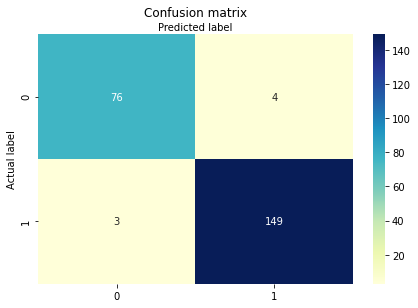

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_cv))
print("Precision:",metrics.precision_score(y_test, y_pred_cv))
print("Recall:",metrics.recall_score(y_test, y_pred_cv))

Accuracy: 0.9698275862068966
Precision: 0.9738562091503268
Recall: 0.9802631578947368


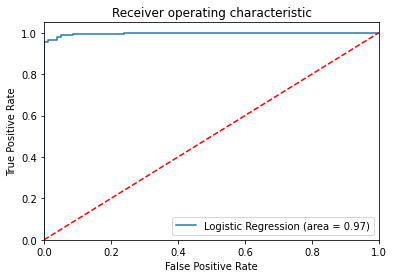

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logregNiko_cv.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logregNiko_cv.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_cv))

              precision    recall  f1-score   support

         0.0       0.96      0.95      0.96        80
         1.0       0.97      0.98      0.98       152

    accuracy                           0.97       232
   macro avg       0.97      0.97      0.97       232
weighted avg       0.97      0.97      0.97       232



Feature: 0, Score: 6.14862
Feature: 1, Score: 1.89806
Feature: 2, Score: 1.00063
Feature: 3, Score: 1.80162
Feature: 4, Score: 2.23640
Feature: 5, Score: 0.77506
Feature: 6, Score: 0.67626
Feature: 7, Score: -0.38524


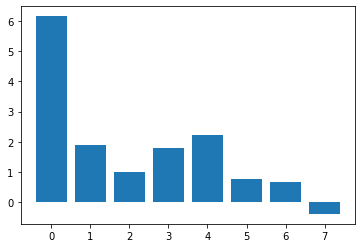

In [ ]:
# logistic regression for feature importance
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

# instantiate the model (using the default parameters)
log_feature = LogisticRegression()
# fit the model with data
log_feature.fit(X_train,y_train)
# get importance
importance = log_feature.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

# Random Forest

In [ ]:
#Train-Test Split
from sklearn.model_selection import train_test_split

X = audit_trial[xnames]
y = audit_trial[yname]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape)

(540, 8) (232, 8)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=20, random_state=0)

clf.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[ 74   2]
 [  5 151]]
              precision    recall  f1-score   support

         0.0       0.94      0.97      0.95        76
         1.0       0.99      0.97      0.98       156

    accuracy                           0.97       232
   macro avg       0.96      0.97      0.97       232
weighted avg       0.97      0.97      0.97       232

0.9698275862068966


In [ ]:
y_score_rf = clf.predict_proba(X_test)[:,-1]

In [ ]:
from sklearn.metrics import average_precision_score, auc, roc_curve, precision_recall_curve
average_precision = average_precision_score(y_test, y_score_rf)

print('Average precision-recall score RF: {}'.format(average_precision))

Average precision-recall score RF: 0.9962462456287204


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=1.00')

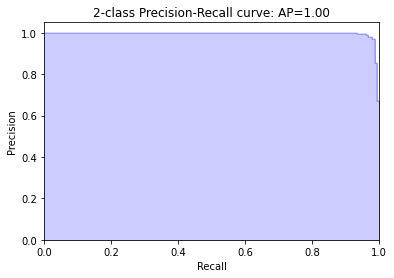

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(y_test, y_score_rf)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

Text(0.5, 1.0, 'Binary class Precision-Recall curve: AP=0.89')

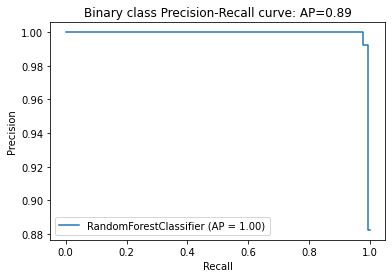

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.metrics import auc, plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(clf, X_test, y_test)
disp.ax_.set_title('Binary class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

In [ ]:
#Now doing cross validation to find the ideal parameters


from sklearn.model_selection import GridSearchCV
clf= RandomForestClassifier ()
parameters={'max_depth':[5,10,20,50,100], 'n_estimators':[50,100,200]}

grid_search = GridSearchCV(clf,parameters,cv=10,return_train_score=True)

grid_search = grid_search.fit(X_train, y_train)
Score_forest = grid_search.best_score_
best_parameters = grid_search.best_params_
print('Score Forest {}'.format(Score_forest))
print('Best Parameters {}'.format(best_parameters))

Score Forest 0.9907407407407407
Best Parameters {'max_depth': 20, 'n_estimators': 100}


In [ ]:
clf_final = RandomForestClassifier (n_estimators=50, max_depth=10)

clf_final.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred= clf_final.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[ 74   2]
 [  3 153]]
              precision    recall  f1-score   support

         0.0       0.96      0.97      0.97        76
         1.0       0.99      0.98      0.98       156

    accuracy                           0.98       232
   macro avg       0.97      0.98      0.98       232
weighted avg       0.98      0.98      0.98       232

0.978448275862069


Feature: 0, Score: 0.45439
Feature: 1, Score: 0.16299
Feature: 2, Score: 0.01336
Feature: 3, Score: 0.12726
Feature: 4, Score: 0.15190
Feature: 5, Score: 0.00182
Feature: 6, Score: 0.00771
Feature: 7, Score: 0.08056


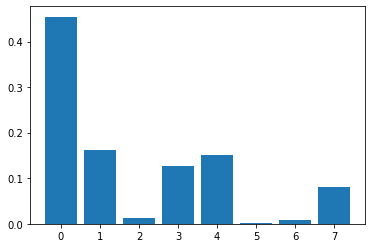

In [ ]:
from matplotlib import pyplot

# get importance
importance = clf_final.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

# KNN

In [ ]:
audit_trial.head()

,Sector_score,LOCATION_ID,PARA_A,PARA_B,numbers,Money_Value,District,Loss,History,Score,Risk
0,3.89,23.0,4.18,2.50,5.0,3.38,2.0,0.0,0.0,2.4,1.0
1,3.89,6.0,0.00,4.83,5.0,0.94,2.0,0.0,0.0,2.0,0.0
2,3.89,6.0,0.51,0.23,5.0,0.00,2.0,0.0,0.0,2.0,0.0
3,3.89,6.0,0.00,10.80,6.0,11.75,2.0,0.0,0.0,4.4,1.0
4,3.89,6.0,0.00,0.08,5.0,0.00,2.0,0.0,0.0,2.0,0.0


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
X = audit_trial.iloc[:,0:9].values
y = audit_trial.iloc[:, 10].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

(-1.0, 2.5)

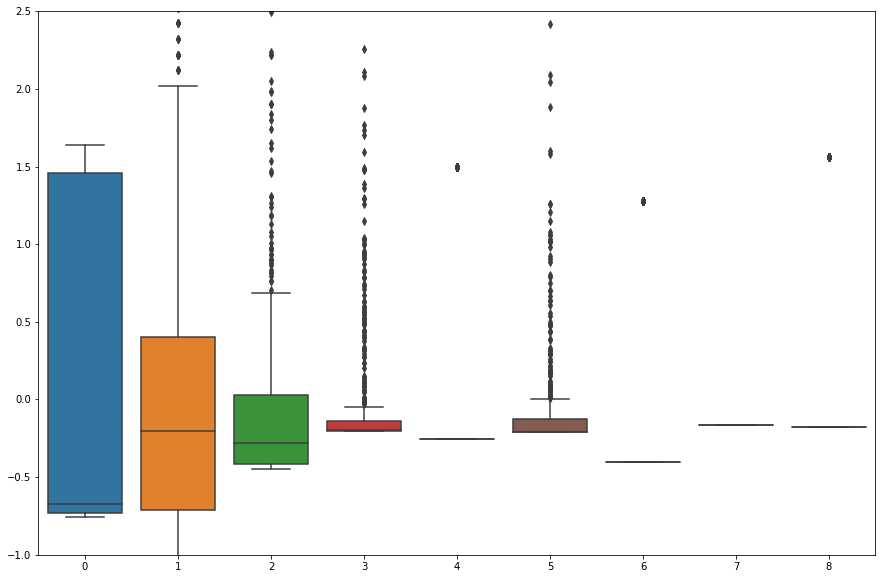

In [ ]:
from sklearn.preprocessing import StandardScaler

standard_scaler=StandardScaler()
X_train=standard_scaler.fit_transform(X_train)
X_test=standard_scaler.transform(X_test)

x2=pd.DataFrame(X_train)
plt.figure(figsize=(15,10))
sns.boxplot(data = x2)
plt.ylim(-1,2.5)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=4)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [ ]:
y_pred_classifier = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(y_test, y_pred_classifier))

Accuracy :  0.8706896551724138


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred_classifier))
print(classification_report(y_test, y_pred_classifier))

[[ 79   3]
 [ 27 123]]
              precision    recall  f1-score   support

         0.0       0.75      0.96      0.84        82
         1.0       0.98      0.82      0.89       150

    accuracy                           0.87       232
   macro avg       0.86      0.89      0.87       232
weighted avg       0.89      0.87      0.87       232



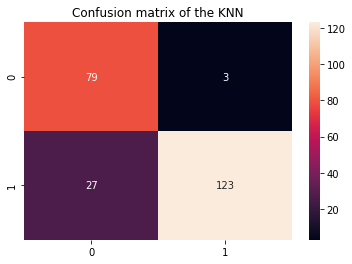

In [ ]:
cm_logi = confusion_matrix(y_test, y_pred_classifier)
plt.title('Confusion matrix of the KNN')
sns.heatmap(cm_logi,annot=True,fmt="d")
plt.show()

In [ ]:
k_range = range(1, 26)

scores = []


for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_classifier_loop = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred_classifier_loop))

print(scores)

[0.9008620689655172, 0.8836206896551724, 0.875, 0.8706896551724138, 0.8793103448275862, 0.875, 0.8793103448275862, 0.8663793103448276, 0.8706896551724138, 0.8663793103448276, 0.875, 0.8577586206896551, 0.8577586206896551, 0.8491379310344828, 0.8448275862068966, 0.8448275862068966, 0.8448275862068966, 0.8362068965517241, 0.8448275862068966, 0.8448275862068966, 0.853448275862069, 0.8491379310344828, 0.8620689655172413, 0.853448275862069, 0.8663793103448276]


Text(0, 0.5, 'Testing Accuracy')

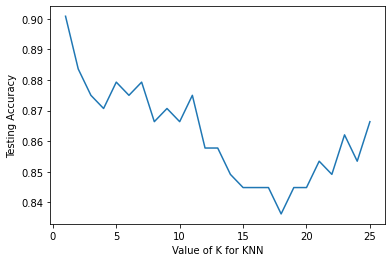

In [ ]:
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

# Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
model_tree = DecisionTreeClassifier(max_depth=1, min_samples_split=2)
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
model_tree.score(X_train, y_train), model_tree.score(X_test, y_test)

(0.8444444444444444, 0.853448275862069)

In [ ]:
yp_tree = model_tree.predict(X_test)

In [ ]:
conf_mat = confusion_matrix(y_test, yp_tree)
conf_mat

array([[ 97,   0],
       [ 34, 101]])

In [ ]:
y_pred_tree=model_tree.predict(X_test)
print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

         0.0       0.74      1.00      0.85        97
         1.0       1.00      0.75      0.86       135

    accuracy                           0.85       232
   macro avg       0.87      0.87      0.85       232
weighted avg       0.89      0.85      0.85       232



In [ ]:
y_score_mt = model_tree.predict_proba(X_test)[:,-1]

In [ ]:
from sklearn.metrics import average_precision_score, auc, roc_curve, precision_recall_curve
average_precision = average_precision_score(y_test, y_score_mt)

print('Average precision-recall score RF: {}'.format(average_precision))

Average precision-recall score RF: 0.8946998722860792


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.89')

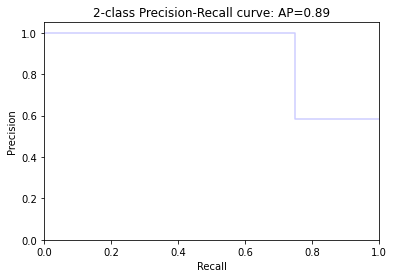

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(y_test, y_score_mt)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')


plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.metrics import auc, plot_precision_recall_curve
import matplotlib.pyplot as plt

In [ ]:
y_score_mt1 = model_tree.predict_proba(X_test)[:, 1]

In [ ]:
# Average precision score
average_precision = average_precision_score(y_test, y_score_mt1)
print(average_precision)

0.8946998722860792


In [ ]:
# Data to plot precision - recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_score_mt1)
# Use AUC function to calculate the area under the curve of precision recall curve
auc_precision_recall = auc(recall, precision)
print(auc_precision_recall)

0.9473499361430395


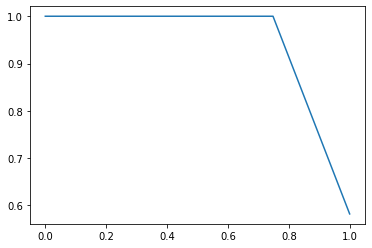

In [ ]:
plt.plot(recall, precision)
plt.show()

Text(0.5, 1.0, 'Binary class Precision-Recall curve: AP=0.89')

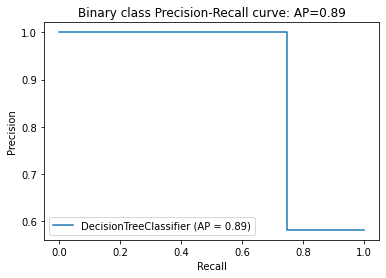

In [ ]:
disp = plot_precision_recall_curve(model_tree, X_test, y_test)
disp.ax_.set_title('Binary class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

In [ ]:
# use GridSearchCV to optimize the model parameters max_depth and min_samples_split
grid_search_cv = GridSearchCV(DecisionTreeClassifier(max_depth=1, min_samples_split=2), 
                              {'max_depth': [1, 2, 3, 4, 5], 
                               'min_samples_split': [1, 2, 3, 4, 5]}, 
                              cv=10)
grid_search_cv.fit(X, y)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=1,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         

In [ ]:
# retrieve best parameter combinations
grid_search_cv.best_params_

{'max_depth': 4, 'min_samples_split': 3}

In [ ]:
# fit a new model on the training data using the best parameters from above
best_model_tree = grid_search_cv.best_estimator_
best_model_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
best_model_tree.score(X_train, y_train), best_model_tree.score(X_test, y_test)

(0.9851851851851852, 0.9655172413793104)

In [ ]:
yp_best_tree = best_model_tree.predict(X_test)

In [ ]:
conf_mat = confusion_matrix(y_test, yp_best_tree)
conf_mat

array([[ 90,   5],
       [  3, 134]])

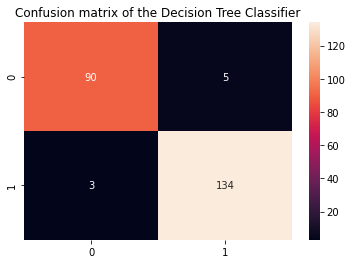

In [ ]:
cm_logi = confusion_matrix(y_test, yp_best_tree)
plt.title('Confusion matrix of the Decision Tree Classifier')
sns.heatmap(cm_logi,annot=True,fmt="d")
plt.show()

In [ ]:
y_pred_best_tree=best_model_tree.predict(X_test)
print(classification_report(y_test, y_pred_best_tree))

              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96        95
         1.0       0.96      0.98      0.97       137

    accuracy                           0.97       232
   macro avg       0.97      0.96      0.96       232
weighted avg       0.97      0.97      0.97       232



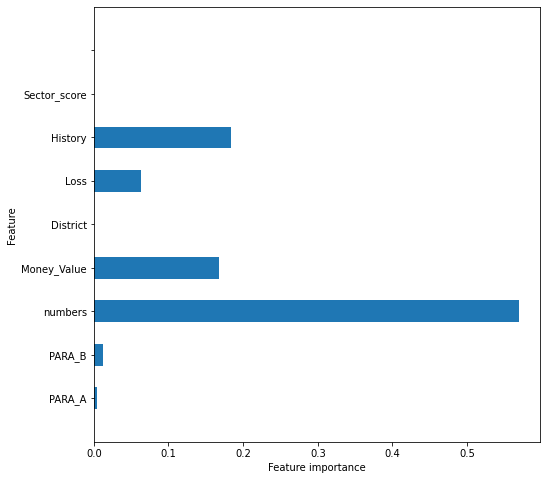

In [ ]:
tree_feature= DecisionTreeClassifier(max_depth=4,min_samples_split=2)
tree_feature.fit(X_train,y_train)
cols=xnames
def plot_feature_importances(model):
    plt.figure(figsize=(8,8))
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, height=0.5,align='center')
    plt.yticks(np.arange(n_features), cols)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances(tree_feature)

Feature: 0, Score: 0.00359
Feature: 1, Score: 0.01227
Feature: 2, Score: 0.56952
Feature: 3, Score: 0.16806
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.06317
Feature: 6, Score: 0.18339
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000


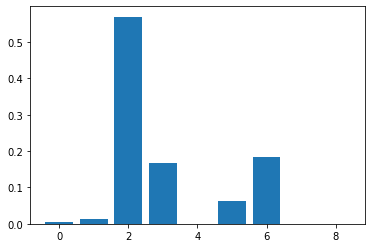

In [ ]:
from matplotlib import pyplot

# get importance
importance = best_model_tree.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Feature: 0, Score: 0.00359
Feature: 1, Score: 0.01227
Feature: 2, Score: 0.56952
Feature: 3, Score: 0.16806
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.06317
Feature: 6, Score: 0.18339
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000


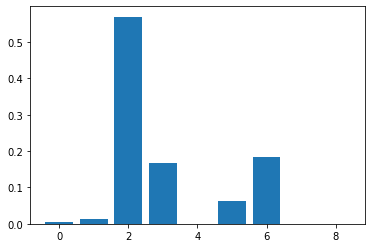

In [ ]:
# decision tree for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
tree_feature= DecisionTreeClassifier(max_depth=4,min_samples_split=2)
tree_feature.fit(X_train,y_train)
# get importance
importance = tree_feature.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()